In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

In [29]:
iris_data = load_iris()
features_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   cluster_id  
0           1  
1           1  
2           1  
3           1  
4           1  


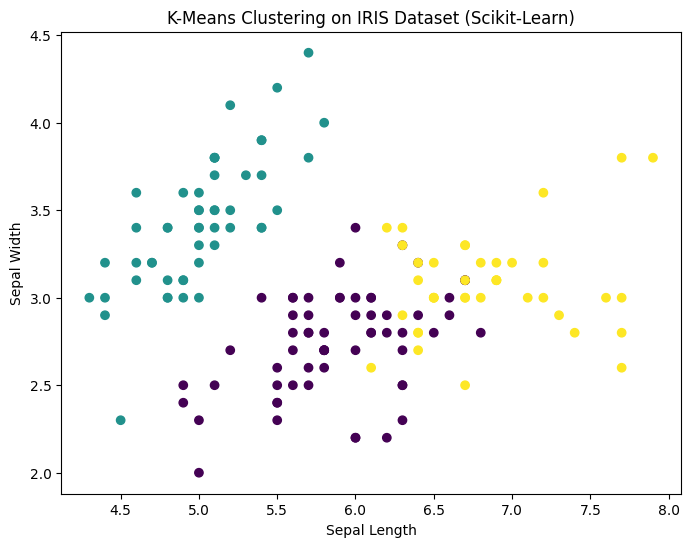

Cluster Centers (Sklearn):
 [[5.88360656 2.74098361 4.38852459 1.43442623]
 [5.006      3.428      1.462      0.246     ]
 [6.85384615 3.07692308 5.71538462 2.05384615]]




In [30]:
kmeans_model = KMeans(n_clusters=3, random_state=0)
kmeans_model.fit(features_df)

cluster_assignments = kmeans_model.labels_

features_df['cluster_id'] = cluster_assignments
print(features_df.head())

plt.figure(figsize=(8, 6))
plt.scatter(features_df.iloc[:, 0], features_df.iloc[:, 1], c=cluster_assignments)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('K-Means Clustering on IRIS Dataset (Scikit-Learn)')
plt.show()

print("Cluster Centers (Sklearn):\n", kmeans_model.cluster_centers_)
print("\n")

Initial Centroids:
 [[5.8 2.8 5.1 2.4]
 [6.  2.2 4.  1. ]
 [5.5 4.2 1.4 0.2]]
Final Centroids (Vectorized):
 [[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.88360656 2.74098361 4.38852459 1.43442623]
 [5.006      3.428      1.462      0.246     ]]


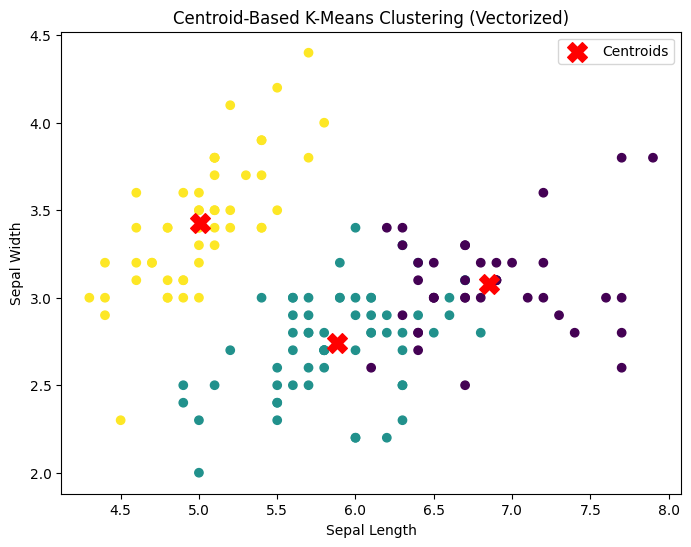

In [31]:
features_array = pd.DataFrame(iris_data.data, columns=iris_data.feature_names).values

num_clusters = 3
np.random.seed(0)

initial_indices = np.random.choice(features_array.shape[0], num_clusters, replace=False)
cluster_centers = features_array[initial_indices]
print("Initial Centroids:\n", cluster_centers)

def find_nearest_cluster(data, centers):
    distances = np.linalg.norm(data[:, None] - centers, axis=2)
    return np.argmin(distances, axis=1)

def compute_new_centroids(data, assignments, k):
    return np.array([data[assignments == i].mean(axis=0) for i in range(k)])

for iteration in range(10):
    current_assignments = find_nearest_cluster(features_array, cluster_centers)
    new_centers = compute_new_centroids(features_array, current_assignments, num_clusters)

    if np.allclose(cluster_centers, new_centers):
        break

    cluster_centers = new_centers

print("Final Centroids (Vectorized):\n", cluster_centers)

plt.figure(figsize=(8, 6))
plt.scatter(features_array[:, 0], features_array[:, 1], c=current_assignments)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Centroid-Based K-Means Clustering (Vectorized)")
plt.legend()
plt.show()
print("\n")

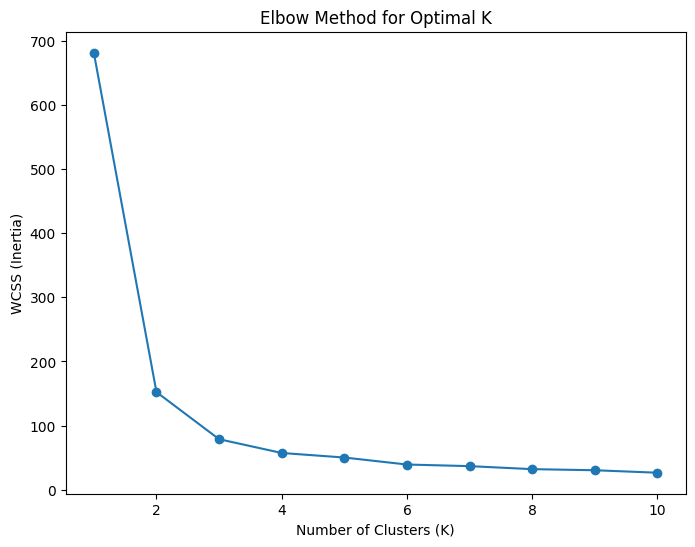

Final Centroids (Manual Loop):
 [[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.88360656 2.74098361 4.38852459 1.43442623]
 [5.006      3.428      1.462      0.246     ]]


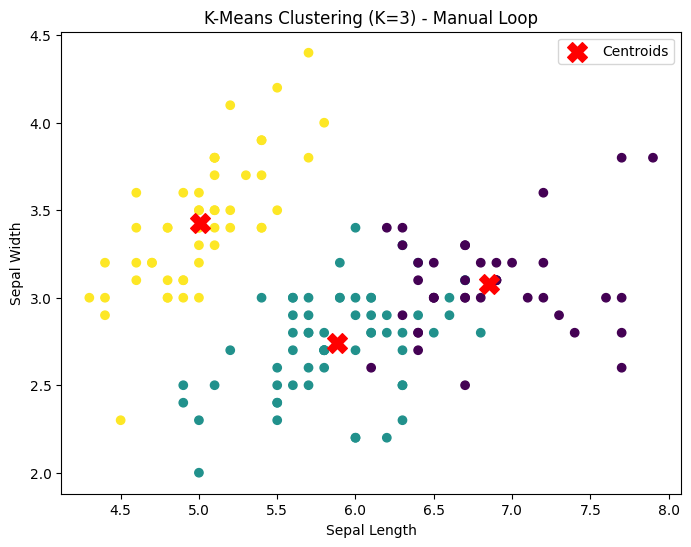

In [32]:
features_array = pd.DataFrame(iris_data.data, columns=iris_data.feature_names).values

def calculate_euclidean_dist(point_a, point_b):
    return np.sqrt(np.sum((point_a - point_b) ** 2))

def perform_manual_kmeans(data, k_count, max_iterations=10):
    np.random.seed(0)
    current_centers = data[np.random.choice(len(data), k_count, replace=False)]

    final_assignments = None

    for _ in range(max_iterations):
        distances = np.array([
            [calculate_euclidean_dist(row, center) for center in current_centers]
            for row in data
        ])
        assignments = np.argmin(distances, axis=1)
        final_assignments = assignments

        new_centers = np.array([data[assignments == i].mean(axis=0) for i in range(k_count)])

        if np.allclose(current_centers, new_centers):
            break
        current_centers = new_centers

    wcss_score = 0
    for i in range(k_count):
        points_in_cluster = data[assignments == i]
        wcss_score += np.sum((points_in_cluster - current_centers[i]) ** 2)

    return wcss_score, current_centers, final_assignments

inertia_values = []
cluster_range = range(1, 11)

for k in cluster_range:
    inertia, _, _ = perform_manual_kmeans(features_array, k)
    inertia_values.append(inertia)

plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia_values, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Method for Optimal K")
plt.show()

num_clusters = 3
np.random.seed(0)

final_centers = features_array[np.random.choice(features_array.shape[0], num_clusters, replace=False)]
final_labels = None

for _ in range(10):
    dist_matrix = np.array([
        [calculate_euclidean_dist(row, center) for center in final_centers]
        for row in features_array
    ])
    final_labels = np.argmin(dist_matrix, axis=1)

    updated_centers = np.array([features_array[final_labels == i].mean(axis=0) for i in range(num_clusters)])

    if np.allclose(final_centers, updated_centers):
        break
    final_centers = updated_centers

print("Final Centroids (Manual Loop):\n", final_centers)

plt.figure(figsize=(8, 6))
plt.scatter(features_array[:, 0], features_array[:, 1], c=final_labels)
plt.scatter(final_centers[:, 0], final_centers[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("K-Means Clustering (K=3) - Manual Loop")
plt.legend()
plt.show()